# Dev Tests of Simulation

In [1]:
import numpy as np
from brian2 import *
from brian2tools import *

WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]


In [2]:
s = Simulation()
rts = RuntimeSimulation()
sas = CPPStandaloneSimulation()

## Set up network

In [37]:
model = Equations('''
    I = g*(v-E) : amp
    v = 10*mvolt :volt
    g : siemens (constant)
    E : volt (constant)
    ''')

dt = 0.1 *ms
defaultclock.dt = dt

neurons = NeuronGroup(1, model, name='neurons')
monitor = StateMonitor(neurons, 'I', record=True, name='monitor')

net = Network(neurons, monitor)
rts.initialize(net)

rts.run(10*ms, {'g': 100, 'E':10}, ['g', 'E'])

In [44]:
isinstance(rts.network, Network)

True

In [38]:
I = getattr(rts.network['monitor'], 'I')

In [39]:
I.shape

(1, 100)

In [40]:
10 / 0.1

100.0

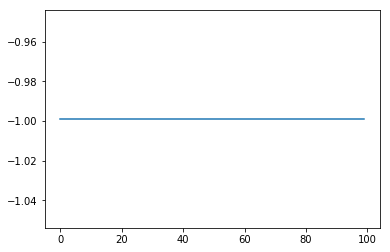

In [41]:
plot(I.transpose());